
# **PROEJCT 3 - SALES PREDICTION USING PYTHON**

# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

# Uploading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Exploration

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail(12)

,Unnamed: 0,TV,Radio,Newspaper,Sales
188,189,286.0,13.9,3.7,15.9
189,190,18.7,12.1,23.4,6.7
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8


In [ ]:
df.shape

(200, 5)

# Checking Basic Information about Data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Describing the Stats

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#Drop 'unnamed : 0'
df.drop('Unnamed: 0',axis =1,inplace = True)
#Preview the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

# Checking for Null Values

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualize the Data

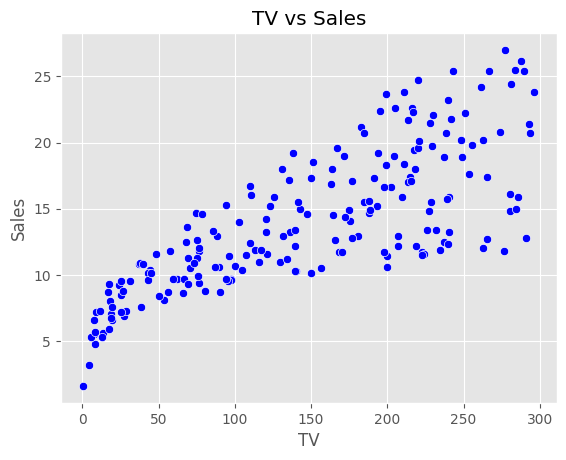

In [ ]:
sns.scatterplot(data = df, x='TV', y='Sales', color = 'blue')
plt.title('TV vs Sales')
plt.show()

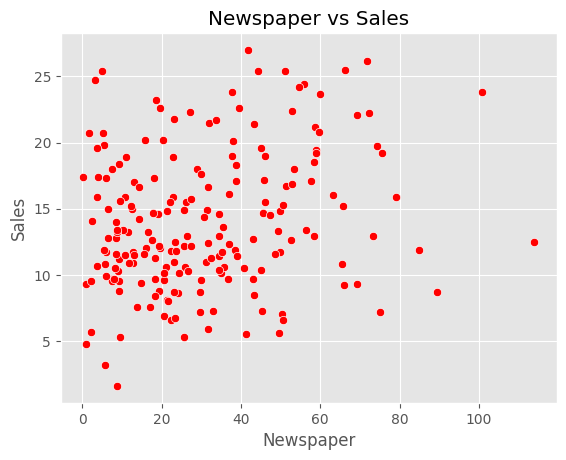

In [ ]:
sns.scatterplot(data = df, x='Newspaper', y='Sales', color = 'red')
plt.title('Newspaper vs Sales')
plt.show()

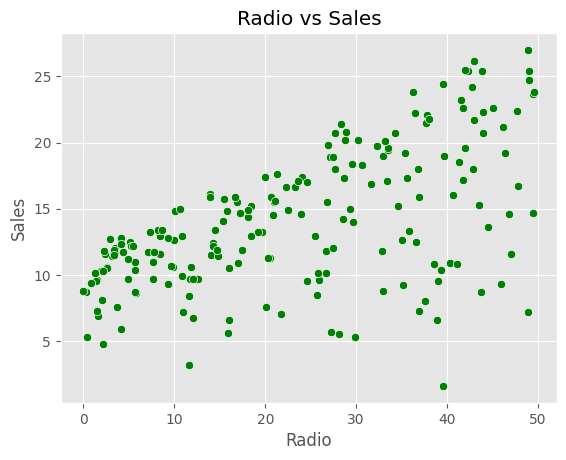

In [ ]:
sns.scatterplot(data = df, x='Radio', y='Sales', color = 'green')
plt.title('Radio vs Sales')
plt.show()

# Segregating into Dependent & Independent

In [ ]:
x = df.iloc[:, :-1]
y = df['Sales']

# Train Test And Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Training the Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
models = {
    'dt' : DecisionTreeRegressor(),
    'lr' : LinearRegression(),
    'random' : RandomForestRegressor()
}

In [ ]:
report = {}
for i in range(len(list(models))):
            model = list(models.values())[i]
            print(f"Model Training started with {model}")
            model.fit(x_train,y_train)
            print(f"Training completed successfully")
            y_test_pred = model.predict(x_test)
            print("Calculating score")
            test_model_score = r2_score(y_test, y_test_pred)
            print(f"Calculted score: {round(test_model_score*100,2)}% for {model}")
            print("=="*30)
            report[list(models.keys())[i]] = test_model_score

Model Training started with DecisionTreeRegressor()
Training completed successfully
Calculating score
Calculted score: 94.12% for DecisionTreeRegressor()
Model Training started with LinearRegression()
Training completed successfully
Calculating score
Calculted score: 86.01% for LinearRegression()
Model Training started with RandomForestRegressor()
Training completed successfully
Calculating score
Calculted score: 97.07% for RandomForestRegressor()


In [ ]:
#Selecting randomforest
random = RandomForestRegressor()

In [ ]:
random.fit(x_train,y_train)
y_pred = random.predict(x_test)

In [ ]:
df.iloc[6].values

array([57.5, 32.8, 23.5, 11.8])

In [ ]:
model.predict([[25.3 , 57.6 , 12.9]])[0]

9.169999999999998